**Realizando os devidos imports**

In [36]:
import pandas as pd
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import numpy as np
from sklearn import datasets
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, cross_validate, train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, f1_score, auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [3]:

# Importação GridSearchCV.
from sklearn.model_selection import GridSearchCV

In [ ]:
#from google.colab import files
#uploaded = files.upload()

**Carregando o dataset**

O data set aqui escolhido foi o famoso brest_cancer

In [4]:
# Dados de Câncer de mama.
cancer = datasets.load_breast_cancer()

# Criação do dataset features e vetor labels.
features = cancer.data
labels = cancer.target

In [5]:
# Só para evitar a aparição dos warnings.
import warnings
warnings.filterwarnings('ignore')

**Aqui chamamos o modelo do classificador Árvore de Decisão**


In [6]:
# Sem nada dentro, pois vamos "variar" os parâmetros.
clf = DecisionTreeClassifier(random_state=0)  
iris = load_iris()


In [7]:
cross_val_score(clf, iris.data, iris.target, cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])

**Separando os dados de treino e dados de teste**

In [8]:
X_tr, X_ts, y_tr, y_ts= train_test_split( features, labels, test_size=0.30, random_state=42)

Criação de Combinações de Parâmetros
Com base numa “lista”” de parâmetros o GridSearchCV criará as combinações e depois as avaliará, por exemplo, quero testar alguns valores de parâmetros de um AdaBoost. Os valores desta “lista” foram arbitrariamente escolhidos e sem nenhum critério técnico, o objetivo é encontrar valores otimizados.



**Estabelecimento dos parametros para uso no gridSearcCV**

In [9]:
# Exemplo dos parâmetros que quero testar.
parametros = { 'criterion':['entropy','gini'],
              'max_depth':[20,25,30],
              'max_features':['auto','sqrt','log2']}

**Função GridSearch que recebe o modelo, parametros, scoring e o número de validações cruzadas a serem feitas**

In [10]:
# Criação do objeto do GridSearchCV.
grid = GridSearchCV(estimator = clf,          # É a nossa Arvore de Classificação.
                    param_grid = parametros,  # É aquele dicionário com valores para serem testados.
                    scoring = 'f1',           # Arbitrariamente escolhi o f1, adiante explico com detalhes.
                    cv = 20)                  # Idem, arbitratiamente escolhi 20 e adiante será explanado.

**Treinando o grid com os dados de treino**

In [11]:
#Após a criação do objeto do GridSearchCV, pode-se treinar e imprimir os resultados.

# Treinando o grid.
grid_fitted=grid.fit(X_tr, y_tr)

# Imprimindo os resultados.
pd.DataFrame(grid_fitted.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002408,0.000668,0.001056,0.000114,entropy,20,auto,"{'criterion': 'entropy', 'max_depth': 20, 'max...",0.888889,0.962963,1.000000,0.916667,0.923077,0.960000,0.928571,1.00,1.00,0.916667,0.956522,0.956522,0.960000,1.000000,0.916667,0.916667,0.96,0.960000,0.880000,0.956522,0.947987,0.035269,1
1,0.002269,0.000103,0.001027,0.000036,entropy,20,sqrt,"{'criterion': 'entropy', 'max_depth': 20, 'max...",0.888889,0.962963,1.000000,0.916667,0.923077,0.960000,0.928571,1.00,1.00,0.916667,0.956522,0.956522,0.960000,1.000000,0.916667,0.916667,0.96,0.960000,0.880000,0.956522,0.947987,0.035269,1
2,0.002273,0.000168,0.001091,0.000137,entropy,20,log2,"{'criterion': 'entropy', 'max_depth': 20, 'max...",0.888889,0.962963,0.960000,0.888889,0.923077,0.923077,0.923077,0.96,1.00,0.818182,0.956522,0.857143,0.923077,0.888889,0.869565,0.916667,1.00,0.956522,0.956522,0.916667,0.924486,0.045426,16
3,0.002320,0.000158,0.001061,0.000121,entropy,25,auto,"{'criterion': 'entropy', 'max_depth': 25, 'max...",0.888889,0.962963,1.000000,0.916667,0.923077,0.960000,0.928571,1.00,1.00,0.916667,0.956522,0.956522,0.960000,1.000000,0.916667,0.916667,0.96,0.960000,0.880000,0.956522,0.947987,0.035269,1
4,0.002261,0.000144,0.001019,0.000045,entropy,25,sqrt,"{'criterion': 'entropy', 'max_depth': 25, 'max...",0.888889,0.962963,1.000000,0.916667,0.923077,0.960000,0.928571,1.00,1.00,0.916667,0.956522,0.956522,0.960000,1.000000,0.916667,0.916667,0.96,0.960000,0.880000,0.956522,0.947987,0.035269,1
5,0.002392,0.000257,0.001147,0.000193,entropy,25,log2,"{'criterion': 'entropy', 'max_depth': 25, 'max...",0.888889,0.962963,0.960000,0.888889,0.923077,0.923077,0.923077,0.96,1.00,0.818182,0.956522,0.857143,0.923077,0.888889,0.869565,0.916667,1.00,0.956522,0.956522,0.916667,0.924486,0.045426,16
6,0.002269,0.000268,0.001093,0.000409,entropy,30,auto,"{'criterion': 'entropy', 'max_depth': 30, 'max...",0.888889,0.962963,1.000000,0.916667,0.923077,0.960000,0.928571,1.00,1.00,0.916667,0.956522,0.956522,0.960000,1.000000,0.916667,0.916667,0.96,0.960000,0.880000,0.956522,0.947987,0.035269,1
7,0.002745,0.000911,0.001275,0.000414,entropy,30,sqrt,"{'criterion': 'entropy', 'max_depth': 30, 'max...",0.888889,0.962963,1.000000,0.916667,0.923077,0.960000,0.928571,1.00,1.00,0.916667,0.956522,0.956522,0.960000,1.000000,0.916667,0.916667,0.96,0.960000,0.880000,0.956522,0.947987,0.035269,1
8,0.002395,0.000300,0.001108,0.000210,entropy,30,log2,"{'criterion': 'entropy', 'max_depth': 30, 'max...",0.888889,0.962963,0.960000,0.888889,0.923077,0.923077,0.923077,0.96,1.00,0.818182,0.956522,0.857143,0.923077,0.888889,0.869565,0.916667,1.00,0.956522,0.956522,0.916667,0.924486,0.045426,16
9,0.001928,0.000175,0.001072,0.000262,gini,20,auto,"{'criterion': 'gini', 'max_depth': 20, 'max_fe...",0.962963,0.960000,1.000000,0.923077,0.962963,0.923077,0.857143,1.00,0.96,0.869565,0.956522,0.909091,1.000000,1.000000,0.916667,0.916667,1.00,0.956522,0.960000,0.909091,0.947167,0.041936,7


Há muitas colunas nesse resultado, então vamos fazer um subset escolhendo as colunas de interesse.

In [12]:
# Imprime colunas de interesse.
pd.DataFrame(grid_fitted.cv_results_)[['params','rank_test_score','mean_test_score']]

,params,rank_test_score,mean_test_score
0,"{'criterion': 'entropy', 'max_depth': 20, 'max...",1,0.947987
1,"{'criterion': 'entropy', 'max_depth': 20, 'max...",1,0.947987
2,"{'criterion': 'entropy', 'max_depth': 20, 'max...",16,0.924486
3,"{'criterion': 'entropy', 'max_depth': 25, 'max...",1,0.947987
4,"{'criterion': 'entropy', 'max_depth': 25, 'max...",1,0.947987
5,"{'criterion': 'entropy', 'max_depth': 25, 'max...",16,0.924486
6,"{'criterion': 'entropy', 'max_depth': 30, 'max...",1,0.947987
7,"{'criterion': 'entropy', 'max_depth': 30, 'max...",1,0.947987
8,"{'criterion': 'entropy', 'max_depth': 30, 'max...",16,0.924486
9,"{'criterion': 'gini', 'max_depth': 20, 'max_fe...",7,0.947167


**Escolha dos melhores valores de parametros escolhidos pelo grid_search**

In [13]:
# Imprime os parâmetros que produziram o ".best_score_".
grid_fitted.best_params_

{'criterion': 'entropy', 'max_depth': 20, 'max_features': 'auto'}

Bem como é possível imprimir o valor de f1 usando o atributo .best_score_.

In [14]:
# Imprimindo o score.
grid_fitted.best_score_

0.9479866043779086

In [15]:
y_pred=grid_fitted.predict(X_ts)

**Chamando o modelo novamente agora com os melhores parametros feitos no grid**

In [22]:
X = cancer.data
y = cancer.target


# Define o modelo final
model = DecisionTreeClassifier(random_state = 42, 
                                   criterion = grid_fitted.best_params_['criterion'], 
                                   max_depth = grid_fitted.best_params_['max_depth'], 
                                   max_features = grid_fitted.best_params_['max_features'])

# Realiza o treinamento do modelo nos dados de treino
model.fit (X, y)


DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='auto',
                       random_state=42)

**Métricas do modelo**

In [18]:
cv_results = cross_validate(clf, features, labels, cv=5, scoring=['balanced_accuracy', 'accuracy', 'precision', 'recall', 'roc_auc']) 

print (' balanced_accuracy = {}\n accuracy = {}\n precision = {}\n recall = {}\n roc_auc = {}'.format(cv_results['test_balanced_accuracy'].mean(),
                                                                                                cv_results['test_accuracy'].mean(),
                                                                                                cv_results['test_precision'].mean(),
                                                                                                cv_results['test_recall'].mean(),
                                                                                                cv_results['test_roc_auc'].mean()))

 balanced_accuracy = 0.915924747451115
 accuracy = 0.9173730787144851
 precision = 0.9457070707070707
 recall = 0.9214397496087636
 roc_auc = 0.915924747451115


**Exibição  da curva roc e da cruva precision-recall:**

Função que plota a curva ROC

In [29]:
def plot_curva_roc(model, model_description, X, Y):

    # Simula os resultados de um modelo que prevê apenas a classe majoritária (classe 0, neste projeto)
    ns_probs = [0 for _ in range(len(Y))]

    # Busca as probabilidaes
    lr_probs = model.predict_proba(X)

    # Mantém apenas as probabilidaes da classe positiva
    lr_probs = lr_probs[:, 1]

    # Calcula as métricas
    ns_auc = roc_auc_score(Y, ns_probs)
    lr_auc = roc_auc_score(Y, lr_probs)

    # Exibe as métricas
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('%s: ROC AUC=%.3f' % (model_description, lr_auc))

    # Calcula a curva roc
    ns_fpr, ns_tpr, _ = roc_curve(Y, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(Y, lr_probs)

    # Exibe o gráfico
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='Decision Tree Classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

No Skill: ROC AUC=0.500
Decision Tree Classifier: ROC AUC=0.962


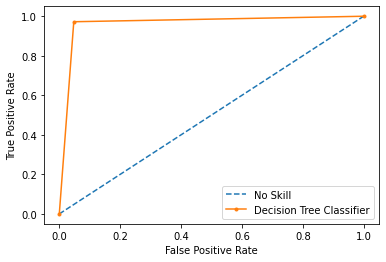

In [30]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.3, random_state=42)

# Retreina o modelo para que a curva fique mais próxima dos resultados que encontramos no cross-validation
model_curvas = DecisionTreeClassifier(random_state = 42, 
                                  criterion = grid_fitted.best_params_['criterion'], 
                                   max_depth = grid_fitted.best_params_['max_depth'], 
                                   max_features = grid_fitted.best_params_['max_features'])

# Realiza o treinamento do modelo nos dados de treino
model_curvas.fit (X_tr, y_tr)

plot_curva_roc(model_curvas, 'Decision Tree Classifier', X_ts, y_ts)

In [33]:
y_pred = model.predict(X_ts) 
y_pred_prob = model.predict_proba(X_ts)

O método predict(), retorna a classe predita para todas as amostras em X_teste_norm. 

Já o método predict_proba() funciona da mesma maneira, porém, ao invés de retornar a classe escolhida pelo classificador, ele  retorna a probabilidade atribuida a cada uma delas. 

Obviamente, a quantidade de probabilidades retornadas vai depender do número de classes.

In [34]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [37]:
mat_conf = confusion_matrix(y_ts, y_pred)
print("Matriz de confusão:")
print(mat_conf)

Matriz de confusão:
[[ 63   0]
 [  0 108]]


Lembrando que a matriz de confusao é dada por:

TP | FN

------
FP | TN